# Lập trình thống kê cơ bản trong Python
# Bài 6: Kiểm tra giả định về phân bố chuẩn

### BS. Lê Ngọc Khả Nhi

# Giới thiệu

Đây là bài thứ 6 trong series về lập trình thống kê cơ bản sử dụng ngôn ngữ Python. Trong bài hôm nay Nhi sẽ hướng dẫn các bạn viết code tạo ra 1 class với công dụng kiểm tra giả định phân bố chuẩn của 1 biến ngẫu nhiên bằng nhiều phương pháp khác nhau. 

Mặc dù tính chất phân bố chuẩn không mấy hữu dụng trên thực tế, nhưng đây là 1 giả định mang tính chất kỹ thuật và bắt buộc với nhiều kiểm định thống kê cổ điển, vốn vẫn đang được dùng trong nghiên cứu y học, do đó ta cần kiểm tra giả định này trước khi suy luận thống kê. 
 
Mục tiêu của chúng ta là kiểm tra xem biến số đang được khảo sát có phân bố tương tự như Gaussian (phân bố bình thường, chuẩn) hay không ? 

Có nhiều cách để kiểm tra giả định này, bao gồm:

1. Trực quan: Histogram, Kernel density plot (đồ thị hàm PDF), biểu đồ QQ

2. Đọc kết quả thống kê mô tả: Skewness, kurtosis, các bách phân vị

2. Phản nghiệm: dùng các loại kiểm định như Shapiro-Wilk, Kolmogorov-Smirnov, D'Agostino, Anderson_Darling ...

Trong bài này chúng ta sẽ dùng Python OOP để tạo ra 1 class dữ liệu Normality_check, trong đó hỗ trợ 6 methods để thực hiện kiểm tra giả định phân bố chuẩn. Các method này chủ yếu dựa trên packages scipy.stats (3 loại kiểm định, skewness, kurtosis), statsmodels (QQplot), seaborn (đồ họa) và pandas (mô tả)

In [2]:
# Tài các thư viện cần thiết

import pandas as pd
import numpy as np

from statsmodels.graphics.gofplots import qqplot
from scipy.stats import shapiro, normaltest, anderson, kstest, skew, kurtosis
import seaborn as sns

# class Normality_check

Nhi viết code để xây dựng class Normality_check. Nội dung của nó rất đơn giản, hàm init khởi tạo object với thuộc tính x là series dữ liệu, sau khi có object này ta có thể dùng 6 methods: 

1) describe : thống kê mô tả, xuất ra mean, sd, nhiều percentiles, skewness và kurtosis

2) QQ_plot: vẽ biểu đồ QQplot

3) Dist_plot: vẽ histogram, KDE plot

4-6) 3 loại kiểm định: Shapiro_Wilk, D'Agostino và Anderson-Darling

In [3]:
class Normality_check:
    '''Class kiểm tra giả định phân bố chuẩn của 1 biến X
    @ Args: x = pandas series
    '''
    
    def __init__(self, x):
        self.x = x
        
    def describe(self, percentiles = [0.25,0.5,0.75]):
        '''Thống kê mô tả
        @ Argument: percentiles(list,float)
        @ Output: pandas series gồm size, mean, sd, các percentiles, skewness, kurtosis
        '''
        o = self.x.describe(percentiles = percentiles)
        sk = pd.Series([skew(self.x), kurtosis(self.x)], index = ['Skew','Kurto'])
        
        return o.append(sk)
    
    def QQ_plot(self):
        '''Vẽ biểu đồ QQplot
        '''
        qqplot(self.x, line='s')
        
    def Dist_plot(self, kde = True, rug = True):
        '''Vẽ histogram và KDE plot
        '''
        sns.distplot(self.x, 
                     kde = kde, 
                     rug = rug, 
                     hist_kws = {'color': 'red'},
                     kde_kws = {'color': 'red'},
                     rug_kws = {'color': 'darkred'}
                    )
        
    def Shapiro_Wilk(self, alpha = 0.05):
        '''Kiểm định Shapiro_Wilk
        @ arguments: alpha = 0.05
        '''
        stat, p = shapiro(self.x)
        shapiro_int = 'Không thể phủ định H0, phân bố gần với Gaussian' if p > alpha \
        else 'Phủ định H0, phân bố không phải Gaussian'
        print(f'Kết quả kiểm định Shapiro-Wilk: stat={stat}, p={p}')
        print(shapiro_int)
        
    def DAgostino(self, alpha = 0.05):
        '''Kiểm định D'Agostino
        @ argument: 
        alpha = 0.05
        '''
        stat, p = normaltest(self.x)
        
        agos_int = 'Không thể phủ định H0, phân bố gần với Gaussian' if p > alpha \
        else 'Phủ định H0, phân bố không phải Gaussian'
        print(f'Kết quả kiểm định D\'Agostino: K2={stat}, p={p}')
        print(agos_int)
        
    def Anderson_Darling(self):
        '''Kiểm định Anderson Darling
        '''
        out = anderson(self.x, dist='norm')
        
        H0 = []

        for i in range(len(out.critical_values)):
            H0.append('No' if out.statistic < out.critical_values[i] else 'Yes')
        
        print(f'Kết quả kiểm định Anderson Darling: stat = {out.statistic}')
        
        return pd.DataFrame({'Critical_vals':  out.critical_values,
                             'Critical_levels': [str(int(sl))+'%' for sl in out.significance_level],
                             'H0 Rejected': H0,
                            })

# Sử dụng Normality_check

Ta chuẩn bị 2 biến X1 có phân bố Gaussian và X2 có phân bố Gamma

In [4]:
x1 = pd.Series(3 * np.random.randn(100) + 10, name = 'Normal_X')

In [5]:
x2 = pd.Series(np.random.gamma(1,0.5,size = 100), name = 'Gamma_X')

Áp dụng class Normality_check cho x1, x2 ta sẽ có 2 object s1, s2

In [6]:
s1= Normality_check(x1)
s2= Normality_check(x2)

In [9]:
help(Normality_check)

Help on class Normality_check in module __main__:

class Normality_check(builtins.object)
 |  Normality_check(x)
 |  
 |  Class kiểm tra giả định phân bố chuẩn của 1 biến X
 |  @ Args: x = pandas series
 |  
 |  Methods defined here:
 |  
 |  Anderson_Darling(self)
 |      Kiểm định Anderson Darling
 |  
 |  DAgostino(self, alpha=0.05)
 |      Kiểm định D'Agostino
 |      @ argument: 
 |      alpha = 0.05
 |  
 |  Dist_plot(self, kde=True, rug=True)
 |      Vẽ histogram và KDE plot
 |  
 |  QQ_plot(self)
 |      Vẽ biểu đồ QQplot
 |  
 |  Shapiro_Wilk(self, alpha=0.05)
 |      Kiểm định Shapiro_Wilk
 |      @ arguments: alpha = 0.05
 |  
 |  __init__(self, x)
 |      Initialize self.  See help(type(self)) for accurate signature.
 |  
 |  describe(self, percentiles=[0.25, 0.5, 0.75])
 |      Thống kê mô tả
 |      @ Argument: percentiles(list,float)
 |      @ Output: pandas series gồm size, mean, sd, các percentiles, skewness, kurtosis
 |  
 |  ------------------------------------------

In [10]:
s1.x

0      8.917347
1      9.500742
2      5.973302
3     10.040272
4     13.800424
        ...    
95    12.284291
96    16.485792
97     7.066268
98    15.615226
99     4.445316
Name: Normal_X, Length: 100, dtype: float64

In [11]:
s1.describe()

count    100.000000
mean       9.486094
std        3.038795
min        2.571722
25%        7.282837
50%        9.479760
75%       11.630816
max       16.485792
Skew       0.020595
Kurto     -0.457680
dtype: float64

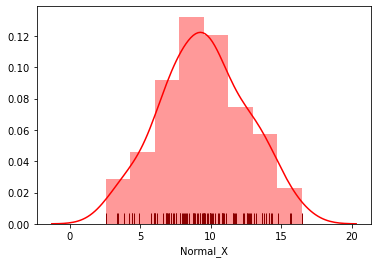

In [12]:
s1.Dist_plot()

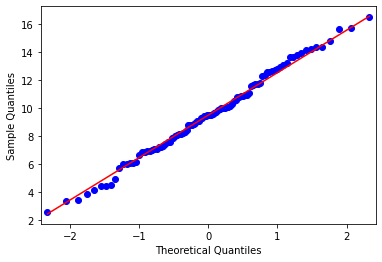

In [13]:
s1.QQ_plot()

In [14]:
s1.Anderson_Darling()

Kết quả kiểm định Anderson Darling: stat = 0.21111640357187866


,Critical_vals,Critical_levels,H0 Rejected
0,0.555,15%,No
1,0.632,10%,No
2,0.759,5%,No
3,0.885,2%,No
4,1.053,1%,No


In [15]:
s1.DAgostino()

Kết quả kiểm định D'Agostino: K2=0.8816606900614632, p=0.6435018706026656
Không thể phủ định H0, phân bố gần với Gaussian


In [16]:
s1.Shapiro_Wilk()

Kết quả kiểm định Shapiro-Wilk: stat=0.9911949038505554, p=0.7603190541267395
Không thể phủ định H0, phân bố gần với Gaussian


In [18]:
s2.describe()

count    100.000000
mean       0.457474
std        0.482454
min        0.001719
25%        0.116374
50%        0.309712
75%        0.680853
max        2.776642
Skew       1.859381
Kurto      4.572454
dtype: float64

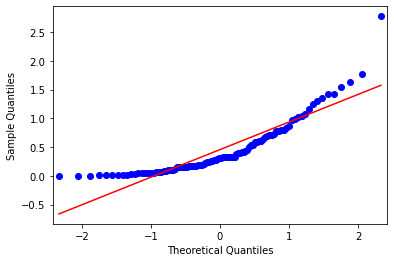

In [19]:
s2.QQ_plot()

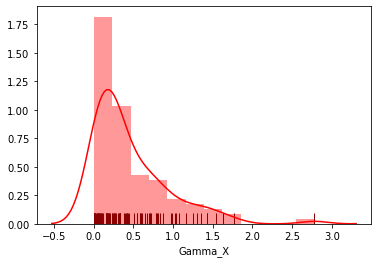

In [20]:
s2.Dist_plot()

In [21]:
s2.Anderson_Darling()

Kết quả kiểm định Anderson Darling: stat = 5.120168479261139


,Critical_vals,Critical_levels,H0 Rejected
0,0.555,15%,Yes
1,0.632,10%,Yes
2,0.759,5%,Yes
3,0.885,2%,Yes
4,1.053,1%,Yes


In [22]:
s2.DAgostino()

Kết quả kiểm định D'Agostino: K2=50.86106525221174, p=9.02942320363825e-12
Phủ định H0, phân bố không phải Gaussian


In [23]:
s2.Shapiro_Wilk()

Kết quả kiểm định Shapiro-Wilk: stat=0.8138601779937744, p=6.751393888393409e-10
Phủ định H0, phân bố không phải Gaussian


Bài thực hành đến đây là hết, như các bạn thấy, Python OOP không quá khó khăn. Với một chút kỹ năng viết code cho function, class và sử dụng các thư viện có sẵn, ta có thể tạo ra những công cụ giản dị, hữu ích cho các công đoạn phân tích thống kê thường quy. 

Chúc các bạn thành công và hẹn gặp lại.